Gaussian Mixture and Expectation Maximization algorithm
===============	

## Goals : An illustration of fitting a data set with a Gaussian distribution and with a Gaussian mixture 

## Requirements : Knowledge on probabilities
1. Inference and probabilities : see my notebook http://romain.raveaux.free.fr/document/NaiveBayesClassifier.html
1. Overfitting of the Maximum Likelihood estimator. : see my notebook http://romain.raveaux.free.fr/document/Overfittingbiaisedandunbiaisedvariance.html

## Author : Romain Raveaux

## Reference : The key concepts are presented in Christopher Bishop Book titled "Pattern Recognition And Machine Learning" more precisely from the section 9.2. 2006
## Reference  : Another good source is Computer Vision: Models, Learning, and Inference.  2012. Author : Simon J. D. Prince.


# It all starts with a problem

The Gaussian distribution is unimodal; neither a given set of data is not well represented by a probability distribution with a single peak.



# The Gaussian distribution
In particular, we can consider the distribution the variable $x$ itself, which is given by

$$Pr(x|\mu,\sigma^2) = \frac{1}{{\sqrt {2\pi \sigma^2 } }} \exp \{ \frac{- (x - \mu ))^2 }{2\sigma ^2}  \}=\mathcal{N}(x|\mu,\sigma^2)  $$
which is governed by two parameters: $\mu$, called the mean, and $\sigma^2$, called the variance.
The square root of the variance, given by $\sigma$, is called the standard deviation.

$$\mathbb{E}[x,\mathcal{N}(x|\mu,\sigma^2)]=\mu$$
$$var[x,\mathcal{N}(x|\mu,\sigma^2)]=\sigma^2$$
$$\mathbb{E}[x^2,\mathcal{N}(x|\mu,\sigma^2)]=\mu^2 +\sigma^2 $$

Let us define a Gaussian function :


In [101]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian(x, mean, var):
    num = -np.power(x - mean, 2.)
    denum = 2 * var
    factor = (np.sqrt(2*var*np.pi))
    res=np.exp(num/denum)
    res = res /factor
    return res


Let us draw Gaussian distribution

(120,)


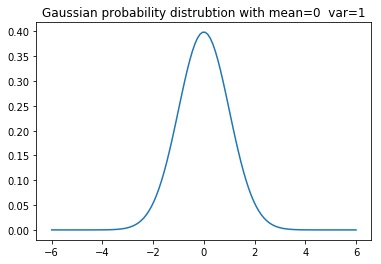

In [102]:
np.random.seed(10)
mean_original=0
var_original=1
std_original=1

#Creates the x axis 120 values between -6 and 6.
x_values = np.linspace(-6, 6, 120)
print(x_values.shape)

plt.figure(1)    
plt.title("Gaussian probability distrubtion with mean="+str(mean_original)+"  var="+str(var_original))
plt.plot(x_values, gaussian(np.array(x_values), mean_original, var_original))
plt.show()


Let us define three Gaussians

(120,)


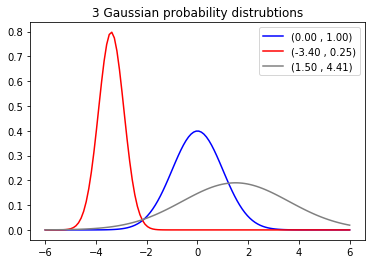

In [103]:
np.random.seed(10)
mean1=0
var1=1

mean2=-3.4
var2=0.25

mean3=1.5
var3=4.41


#Creates the x axis 120 values between -6 and 6.
x_values = np.linspace(-6, 6, 120)
print(x_values.shape)

plt.figure(1)    
plt.title("3 Gaussian probability distrubtions")
plt.plot(x_values, gaussian(np.array(x_values), mean1, var1),color="blue")
plt.plot(x_values, gaussian(np.array(x_values), mean2, var2),color="red")
plt.plot(x_values, gaussian(np.array(x_values), mean3, var3),color="gray")
plt.legend(["("+"{0:.2f}".format(mean1)+" , "+"{0:.2f}".format(var1)+")",
    "("+"{0:.2f}".format(mean2)+" , "+"{0:.2f}".format(var2)+")","("+"{0:.2f}".format(mean3)+" , "+"{0:.2f}".format(var3)+")"])
plt.show()

Let us sample the three Gaussian distribution. We will obtrain three data sets. Each data set contrains samples from a given Gaussian.

(100, 1)


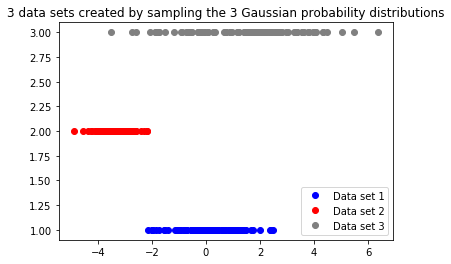

In [104]:
#Let us do the sampling from each distribution
dataset1=np.random.normal(mean1,np.sqrt(var1),(100,1))
dataset2=np.random.normal(mean2,np.sqrt(var2),(100,1))
dataset3=np.random.normal(mean3,np.sqrt(var3),(100,1))
print(dataset1.shape)
datasetone=np.ones(dataset1.shape)
datasettwo=np.ones(dataset1.shape)*2
datasetthree=np.ones(dataset1.shape)*3

plt.figure(1)    
plt.title("3 data sets created by sampling the 3 Gaussian probability distributions")
plt.plot(dataset1,datasetone,'ro',color="blue")
plt.plot(dataset2,datasettwo,'ro',color="red")
plt.plot(dataset3,datasetthree,'ro',color="gray")
plt.legend(["Data set 1", "Data set 2", "Data set 3"])
plt.show()

# Regarding the data set

1. The data set is really challenging. 
2. It is a 1D data set.
3. Samples drawn from one Gaussian overlapps with the others.

# Hard Gaussian assignment
Let us re label the data sets according the maximum of likelihood.
$$z= arg \max_{k \in \{1,2,3 \} } Pr(x|\mu_k,\sigma_k) \quad x \in dataset 1$$
$$z= arg \max_{k \in \{1,2,3 \} } \mathcal{N}(x,\mu_k,\sigma_k^2) \quad x \in dataset 1$$

(100, 3)


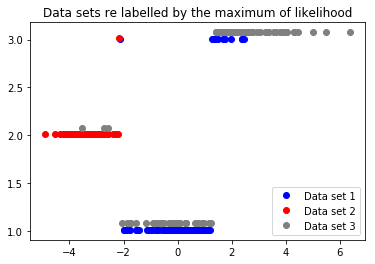

The rate of good classification or labelling for data set 1 is= 0.88
The rate of good classification or labelling for data set 2 is= 0.99
The rate of good classification or labelling for data set 3 is= 0.59


In [105]:
#We compute the probailities for each point of the first data set to be generated by each Gaussian.
proba1Gaussian1 = gaussian(dataset1,mean1,var1)
proba1Gaussian2 = gaussian(dataset1,mean2,var2)
proba1Gaussian3 = gaussian(dataset1,mean3,var3)

# Let us stak the probabilities in a row manner
proba1 = np.hstack((proba1Gaussian1, proba1Gaussian2,proba1Gaussian3)) 
print(proba1.shape)

# Let us assign each point to the Gaussian that provides the maximum of probability
labels1=np.argmax(proba1,axis=1)+1

#We do the same for datatet2

#We compute the probailities for each point of the second data set to be generated by each Gaussian.
proba2Gaussian1 = gaussian(dataset2,mean1,var1)
proba2Gaussian2 = gaussian(dataset2,mean2,var2)
proba2Gaussian3 = gaussian(dataset2,mean3,var3)

# Let us stak the probabilities in a row manner
proba2 = np.hstack((proba2Gaussian1, proba2Gaussian2,proba2Gaussian3)) 

# Let us assign each point to the Gaussian that provides the maximum of probability
labels2=np.argmax(proba2,axis=1)+1

#We do the same for datatet3

#We compute the probailities for each point of the third data set to be generated by each Gaussian.
proba3Gaussian1 = gaussian(dataset3,mean1,var1)
proba3Gaussian2 = gaussian(dataset3,mean2,var2)
proba3Gaussian3 = gaussian(dataset3,mean3,var3)

# Let us stak the probabilities in a row manner
proba3 = np.hstack((proba3Gaussian1, proba3Gaussian2,proba3Gaussian3)) 

# Let us assign each point to the Gaussian that provides the maximum of probability
labels3=np.argmax(proba3,axis=1)+1



plt.figure(1)    
plt.title("Data sets re labelled by the maximum of likelihood")
plt.plot(dataset1,labels1+(np.random.random()*0.1),'ro',color="blue")
plt.plot(dataset2,labels2+(np.random.random()*0.1),'ro',color="red")
plt.plot(dataset3,labels3+(np.random.random()*0.1),'ro',color="gray")
plt.legend(["Data set 1", "Data set 2", "Data set 3"])
plt.show()

nbgood1=(labels1[:,]==1)
nbgood2=(labels2[:,]==2)
nbgood3=(labels3[:,]==3)

print("The rate of good classification or labelling for data set 1 is=",nbgood1.sum()/nbgood1.shape[0])
print("The rate of good classification or labelling for data set 2 is=",nbgood2.sum()/nbgood2.shape[0])
print("The rate of good classification or labelling for data set 3 is=",nbgood3.sum()/nbgood3.shape[0])




# Soft Gaussian assignment : Responsability

## Gaussian mixture distribution
The Gaussian mixture distribution can be written as a linear superposition of Gaussians in the form:
$$ Pr(x) = \sum_{k=1}^K \pi_k \mathcal{N}(x,\mu_k,\sigma^2_k) $$
## Introduction of a latent variable z
Let us introduce a K-dimensional binary random variable $\textbf{z}$ having a 1-of-K representation in which a particular element $z_kk$ is equal to 1 and all other elements are equal to 0. The values of $z_k$ therefore satisfy $z_k \in \{0, 1\}$ and $\sum_{k=1}^K z_k =1$, and we see that there are $K$ possible states for the vector $\textbf{z}$ according to which element is nonzero. We shall define the joint distribution $Pr(x, \textbf{z})$ in terms of a marginal distribution $Pr(\textbf{z})$ and a conditional distribution $Pr(x|\textbf{z})$. The marginal distribution over $\textbf{z}$ is specified in terms of the
mixing coefficients $\pi_k$, such that:
$$Pr(z_k=1)=\pi_k$$

where the parameters $\{\pi_k\}$ must satisfy
$$0 \leq \pi_k \leq 1 $$
together with
$$\sum_{k=1}^K \pi_k =1 $$
in order to be valid probabilities. Because $\textbf{z}$ uses a 1-of-K representation, we can also write this distribution in the form
$$Pr(\textbf{z})=\prod_{k=1}^K \pi_k^{z_k} $$

Similarly, the conditional distribution of $x$ given a particular value for $\textbf{z}$ is a Gaussian
$$Pr(x|z_k=1)=\mathcal{N}(x|\mu_k,\sigma_k) $$
which can also be written in the form
$$Pr(x|\textbf{z})=\prod_{k=1}^K \mathcal{N}(x|\mu_k,\sigma_k)^{z_k} $$
The joint distribution $Pr(x,\textbf{z}))$ is given by $Pr(\textbf{z})Pr(x|\textbf{z})$, and the marginal distribution of x is then obtained by summing the joint distribution over all possible states of $\textbf{z}$ to give
$$Pr(x)=\sum_{\textbf{z}} Pr(x,\textbf{z})) = \sum_{\textbf{z}} Pr(\textbf{z})Pr(x|\textbf{z}) =\sum_{k=1}^K \pi_k \mathcal{N}(x,\mu_k,\sigma^2_k) $$

If If we have several observations $x_1, \cdots, x_N$, then for every observed data point $x_n$ there is a corresponding latent variable $z_n$.

## Responsability
The conditional probability of $\textbf{z}$ given $x$. We use $\lambda(z_k)$ to denote $Pr(z_k = 1|x)$, whose value can be found
using Bayes’ theorem.
$$Pr(x,\textbf{z})) = Pr(\textbf{z})Pr(x|\textbf{z})$$
$$Pr(\textbf{z}),x) = Pr(x)Pr(\textbf{z}|x)$$
$$Pr(x,\textbf{z})) =Pr(\textbf{z}),x)$$
$$Pr(\textbf{z})Pr(x|\textbf{z}) = Pr(x)Pr(\textbf{z}|x)$$
$$Pr(\textbf{z}|x)=\frac{Pr(\textbf{z})Pr(x|\textbf{z})}{ Pr(x)}$$
$$Pr(z_k=1|x)=\frac{Pr(z_k=1)Pr(x|z_k=1)}{ Pr(x)}$$
$$Pr(z_k=1|x)=\frac{\pi_k \mathcal{N}(x,\mu_k,\sigma^2_k)}{ \sum_{k=1}^K \pi_k \mathcal{N}(x,\mu_k,\sigma^2_k)}$$

We shall view $\pi_k$ as the prior probability of $z_k = 1$, and the quantity $\lambda(z_k)$ as the corresponding posterior probability once we have observed $x$. As we shall see later, $\lambda(z_k)$ can also be viewed as the responsibility that Gaussian $k$  takes for ‘explaining’ the observation $x$.

(100, 3)
(100, 3)
[4.64706743e-01 8.07877236e-20 5.35293257e-01]
1.0


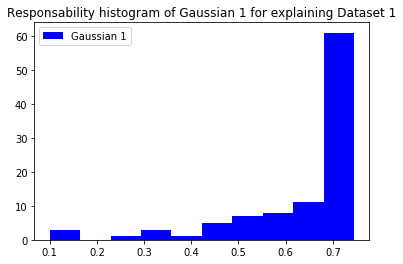

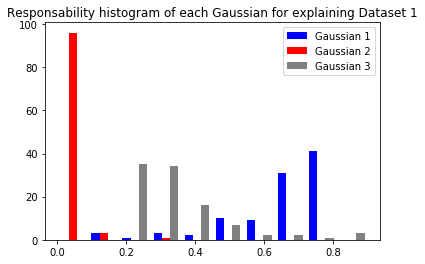

In [106]:
#We first need pi_k that a priori knowledge on each Gaussian.
# Let us say that pi_k=(1/3)
pi1=(1/3)
pi2=(1/3)
pi3=(1/3)

#We compute the probabilities for each point of the first data set to be generated by each Gaussian.
proba1Gaussian1 = gaussian(dataset1,mean1,var1)*pi1
proba1Gaussian2 = gaussian(dataset1,mean2,var2)*pi2
proba1Gaussian3 = gaussian(dataset1,mean3,var3)*pi3

# Let us stak the probabilities in a row manner
proba1 = np.hstack((proba1Gaussian1, proba1Gaussian2,proba1Gaussian3)) 
print(proba1.shape)

#Let's compute the responsability
resp1=proba1/proba1.sum(axis=1).reshape((proba1.shape[0],1))
print(resp1.shape)
#print(resp1.sum(axis=1))
print(resp1[0,:])
print(resp1[0,:].sum())

plt.figure(1)
plt.title("Responsability histogram of Gaussian 1 for explaining Dataset 1")
plt.hist(resp1[:,0],color=["blue"])
plt.legend(["Gaussian 1"])
plt.show()

plt.figure(2)
plt.title("Responsability histogram of each Gaussian for explaining Dataset 1")
plt.hist(resp1,color=["blue","red","gray"])
plt.legend(["Gaussian 1","Gaussian 2","Gaussian 3"])
plt.show()

# Maximum likelihood

Suppose we have a data set of observations $\{x_1, . . . , x_N\}$, and we wish to model this data using a mixture of Gaussians. We can represent this data set as an $N \times 1$ matrix $X$ in which the nth row is given by $x_n$. Similarly, the corresponding latent variables will be denoted by an $N \times K$ matrix $Z$ with rows $\textbf{z}_n^T$. If we assume that the data points are drawn independently from the distribution, then we can express
the log of the likelihood function by:
$$\ln Pr(X,\pi,\mu,\sigma^2)=\sum_{n=1}^N \ln \{ \sum_{k=1}^K \pi_k \mathcal{N}(x_n,|\mu_k,\sigma_k^2) \} $$
Before discussing how to maximize this function, it is worth emphasizing that there is a significant problem associated with the maximum likelihood framework applied to Gaussian mixture models, due to the presence of singularities.
Suppose that one of the components of the mixture model, let us say the $j^{th}$ component, has its mean $\mu_j$ exactly equal to one of the data points so that $μ_j = x_n$ for some value of $n$. 
If we consider the limit $\sigma_j \to 0$, then the log likelihood function will go to infinity.
Thus the maximization of the log likelihood function is not a well posed problem because such singularities will always be present and will occur whenever one of the Gaussian components "collapses" onto a specific data point. Recall that this problem did not arise in the case of a single Gaussian distribution.
These singularities provide another example of the severe over-fitting that can occur in a maximum likelihood approach.


Maximizing the log likelihood function for a Gaussian mixture model turns out to be a more complex problem than for the case of a single Gaussian. The difficulty arises from the presence of the summation over $k$ that appears inside the logarithm, so that the logarithm function no longer acts directly on the Gaussian. If we set the derivatives of the log likelihood to zero, we will no longer obtain a closed form solution.

One approach is to apply gradient-based optimization techniques or an alternative approach known as the EM algorithm which has broad applicability.

# EM for Gaussian mixtures

An elegant and powerful method for finding maximum likelihood solutions for models with latent variables is called the expectation-maximization algorithm, or EM algorithm.

Let us begin by writing down the conditions that must be satisfied at a maximum of the likelihood function. Setting the derivatives of $\ln Pr(X,\pi,\mu,\sigma^2)$ with respect to the means $\mu_k$ of the Gaussian components to zero, we obtain
$$- \sum_{n=1}^N \frac{\pi_k \mathcal{N}(x_n|\mu_k,\sigma^2_k) }{\sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j,\sigma^2_j)} \sigma_k^2 (x_n-\mu_k) =0$$
and rearranging we obtain
$$\mu_k= \frac{1}{N_k} \sum_{n=1}^N \lambda(z_{nk}) x_n $$
where we have defined:
$$N_k=  \sum_{n=1}^N \lambda(z_{nk})  $$

We can interpret Nk as the effective number of points assigned to cluster $k$. Note carefully the form of this solution. We see that the mean $\mu_k$ for the $k^{th}$ Gaussian component is obtained by taking a weighted mean of all of the points in the data set, in which the weighting factor for data point $x_n$ is given by the posterior probability $\lambda(z{nk})$ that component $k$ was responsible for generating $x_n$.

If we set the derivative of  $\ln Pr(X,\pi,\mu,\sigma^2)$ with respect to $\sigma^2$ to zero
$$\sigma^2_k= \frac{1}{N_k} \sum_{n=1}^N \lambda(z_{nk}) (x_n-\mu_k)^2$$

which has the same form as the corresponding result for a single Gaussian fitted to the data set, but again with each data point weighted by the corresponding posterior probability and with the denominator given by the effective number of points associated with the corresponding component.

Finally, we maximize $\ln Pr(X,\pi,\mu,\sigma^2)$ with respect to the mixing coefficients
$\pi_k$. Here we must take account of the constraint which requires the mixing coefficients to sum to one. This can be achieved using a Lagrange multiplier and maximizing the following quantity
$$\ln Pr(X,\pi,\mu,\sigma^2)+ \alpha ( (\sum_{k=1}^K \pi_k )-1 ) $$

$$\sum_{n=1}^N \frac{ \mathcal{N}(x_n|\mu_k,\sigma^2_k) }{\sum_{j=1}^K \pi_j \mathcal{N}(x_n|\mu_j,\sigma^2_j)} + \alpha =0$$
Rearranging we obtain
$$\pi_k = \frac{N_k}{N} $$
so that the mixing coefficient for the $k^{th}$ component is given by the average responsibility which that component takes for explaining the data points.

These results do suggest a simple iterative scheme for finding a solution to the maximum likelihood problem, which turns out to be an instance of the EM algorithm for the particular case of the Gaussian mixture model.

# EM algorithm

Given a Gaussian mixture model, the goal is to maximize the likelihood function
with respect to the parameters (comprising the means and covariances of the
components and the mixing coefficients).
1. Initialize the means $\mu_k$, covariances $\sigma_k$ and mixing coefficients $\pi_k$, and evaluate the initial value of the log likelihood.
2. E step. Evaluate the responsibilities using the current parameter values
$$Pr(z_{nk}=1|x)=\lambda(z_{nk})=\frac{\pi_k \mathcal{N}(x_n,\mu_k,\sigma^2_k)}{ \sum_{k=1}^K \pi_k \mathcal{N}(x_n,\mu_k,\sigma^2_k)}$$

3. M step. Re-estimate the parameters using the current responsibilities

$$\mu_k^{new}= \frac{1}{N_k} \sum_{n=1}^N \lambda(z_{nk}) x_n $$
$$\sigma^{2new}_k= \frac{1}{N_k} \sum_{n=1}^N \lambda(z_{nk}) (x_n-\mu_k^{new})^2$$
$$\pi_k^{new} = \frac{N_k}{N} $$
Where 
$$N_k=  \sum_{n=1}^N \lambda(z_{nk})  $$

4. Evaluate the log likelihood
$$\ln Pr(X,\pi,\mu,\sigma^2)=\sum_{n=1}^N \ln \{ \sum_{k=1}^K \pi_k \mathcal{N}(x_n,|\mu_k,\sigma_k^2) \} $$
and check for convergence of either the parameters or the log likelihood. If
the convergence criterion is not satisfied return to step 2.

# Coding the EM algorithm

(300, 3)
Nk= [193.58908429  12.52216924  93.88874647]
pi= [0.64529695 0.04174056 0.31296249]
(1, 3)
mu= [[-0.99270094  1.27686696 -0.07915453]]
(300, 1)
sigma= [6.67599261] [0.58117271] [3.38307383]
(300, 3)
Log Max Likelihood= 3.5246
Nk= [197.41604165  12.09207833  90.49188002]
pi= [0.65805347 0.04030693 0.3016396 ]
(1, 3)
mu= [[-0.96823248  1.30177353 -0.09078347]]
(300, 1)
sigma= [6.24000199] [0.65145995] [4.2326824]
(300, 3)
Log Max Likelihood= 3.5226
Nk= [198.86325278  11.95651657  89.18023064]
pi= [0.66287751 0.03985506 0.29726744]
(1, 3)
mu= [[-0.95384271  1.31519146 -0.10831422]]
(300, 1)
sigma= [5.90467209] [0.71007387] [4.97551952]
(300, 3)
Log Max Likelihood= 3.5217
Nk= [199.23861628  12.01738355  88.74400018]
pi= [0.66412872 0.04005795 0.29581333]
(1, 3)
mu= [[-0.95052764  1.32475307 -0.11445163]]
(300, 1)
sigma= [5.65696753] [0.75919459] [5.52839441]
(300, 3)
Log Max Likelihood= 3.5214
Nk= [199.17929631  12.20833946  88.61236423]
pi= [0.66393099 0.04069446 0.29537455]
(1, 

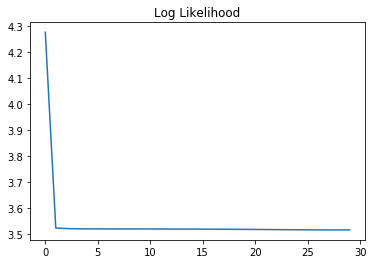

In [173]:

it=0
#20 iterations
nbit=30
#Random initialization of the pamaters
mu_1=np.random.random()
sigma_1=np.random.random()
pi_1=np.random.random()

mu_2=np.random.random()
sigma_2=np.random.random()
pi_2=np.random.random()

mu_3=np.random.random()
sigma_3=np.random.random()
pi_3=np.random.random()

#Let us stack the three datasets into one
dataset=np.vstack((dataset1.copy(),dataset2.copy(),dataset3.copy()))
dataset=dataset.copy()
error=[]

#Main loop
while it<nbit:
    #We compute the probabilities for each point of the first data set to be generated by each Gaussian.
    proba1Gaussian1 = gaussian(dataset,mu_1,sigma_1)*pi_1
    proba1Gaussian2 = gaussian(dataset,mu_2,sigma_2)*pi_2
    proba1Gaussian3 = gaussian(dataset,mu_3,sigma_3)*pi_3
    
    
    # Let us stak the probabilities in a row manner
    proba = np.hstack((proba1Gaussian1, proba1Gaussian2,proba1Gaussian3)) 
    print(proba.shape)

    
    #Let's compute the responsability
    resp=proba/proba.sum(axis=1).reshape((proba.shape[0],1))
    
    #This is the end of the E step
    
    #Let's compute the objective function the Maximum of Likelihood
    ObjectiveFunction=np.log(proba1Gaussian1.sum()+proba1Gaussian2.sum()+proba1Gaussian3.sum())
    error.append(ObjectiveFunction)
    if it>0:
        print("Log Max Likelihood=","{0:.4f}".format(ObjectiveFunction))
    
    #Let us do the M step
    
    #Let's compute Nk
    Nk=resp.sum(axis=0)
    print("Nk=",Nk)
    #Let's compute pi_k
    pi=Nk/dataset.shape[0]
    print("pi=",pi)
    pi_1=pi[0]
    pi_2=pi[1]
    pi_3=pi[2]
    
    #Let's compute the mu
    mu=dataset.T.dot(resp)
    print(mu.shape)
    mu=mu/Nk
    print("mu=",mu)
    mu_1=mu[0,0]
    mu_2=mu[0,1]
    mu_3=mu[0,2]
    
    #Let's compute the sigma
    
    diff1=dataset-mu_1
    diff1=diff1*diff1
    print(diff1.shape)
    sigma_1=resp[:,0].T.dot(diff1)
    sigma_1=sigma_1/Nk[0]
    
    
    diff2=dataset-mu_2
    diff2=diff2*diff2
    sigma_2=resp[:,1].T.dot(diff2)
    sigma_2=sigma_2/Nk[1]
    
    diff3=dataset-mu_3
    diff3=diff3*diff3
    sigma_3=resp[:,2].T.dot(diff3)
    sigma_3=sigma_3/Nk[2]
    
    print("sigma=",sigma_1,sigma_2,sigma_3)
    sigma=np.array([sigma_1,sigma_2,sigma_3])
    sigma=sigma.T
    
    
    #Another way to compute sigma
    """diff=np.hstack((dataset, dataset,dataset) 
    print(diff.shape)
    diff=diff-mu
    diff=diff*diff
    print(diff.shape)
    sig=resp.T.dot(diff)
    print(sig.shape)
    sigma=np.diag(sig)
    sigma=sigma.reshape(1,sigma.shape[0])
    sigma_1=sigma[0,0]/Nk[0]
    sigma_2=sigma[0,1]/Nk[1]
    sigma_3=sigma[0,2]/Nk[2]
    
    print(sigma.shape)"""
        
        
    it=it+1
    
    
plt.figure(1)    
plt.title("Log Likelihood")
plt.plot(error)
plt.show()

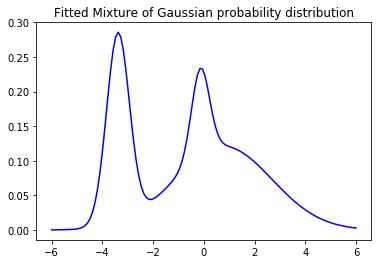

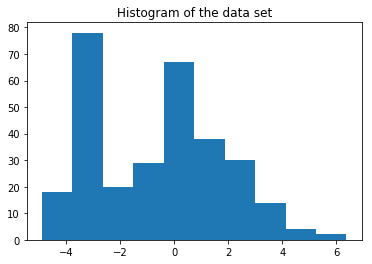

In [172]:
def GaussianMixture(x,pi,mu,sigma):
    res=0
    for i in range(pi.shape[0]):
        res=res+pi[i]*gaussian(x, mu[0,i], sigma[0,i])
    
    return res

plt.figure(1)    
plt.title("Fitted Mixture of Gaussian probability distribution")
plt.plot(x_values, GaussianMixture(np.array(x_values),pi,mu,sigma),color="blue")
plt.show()

plt.figure(2)    
plt.title("Histogram of the data set")
plt.hist(dataset)
plt.show()

# Conclusion

We have seen how to model a data set thanks to a Gaussian Mixture distribution. We use the maximum likelihood to estimate the Gaussian Mixture parameters. For Gaussian Mixture no closed-form is available to compute the Maximum likelihood. So It is achieved thanks to the EM algorithm.


# Extension to multivariate Gaussian distributions ... to be continued